# Harmonic Generation in 3D

Necessary imports:

In [1]:
import sys 
sys.path.append('..')

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import get_field_data as gfd
from numpy.fft import fft2

**Note:** MPI-capable visualization tools like [Paraview](https://www.paraview.org/) should be considered to generate visualizations (like [this one](../paraview_visualizations/3d_overlap_fft.png)).
Using the binary output format (and conversion to netCDF or HDF5) is a better option for large simulations.

Point to the directories, where the data lie.

In [3]:
# Data path
scratch_dir = "/project/th-scratch/a/And.Lindner"

# Data folder
folder = "3d_hh_gen"
folder2 = "3d_gaussian_full"

### Description of the data

Two equal Gaussian waves with a wavelength of $2\mu m$ are propagated in a box of the size $80\mu m  \times  80\mu m  \times 20\mu m$.
The box is divided into $800 \times 800 \times 200 $ points.

The waves collide at an angle of 135° and both have their center at $(40,40,10)\mu m$.
The simulation time is $20 \mu m$.
There is an output after the full simulation time, where the waves overlap exacly.

4- and 6-photon processes are simulated on top of the linear vacuum.

List the technical simulation parameters for passing to the `get_field_data` function.

In [4]:
component=2
path = os.path.join(scratch_dir,folder)
steps=[50,100]
n_prc=list(range(0,128))
n_patches=[8,8,2]
patch_shape=[100,100,100]

In [5]:
ez=gfd.combine_steps(gfd.get_field3D,path,component,n_prc,patch_shape,n_patches,steps=steps)

### Check it out

### Middle slice $(10\mu m)$:

The vertical center is at $10\mu m$, so at index 100.
So we first slice there.

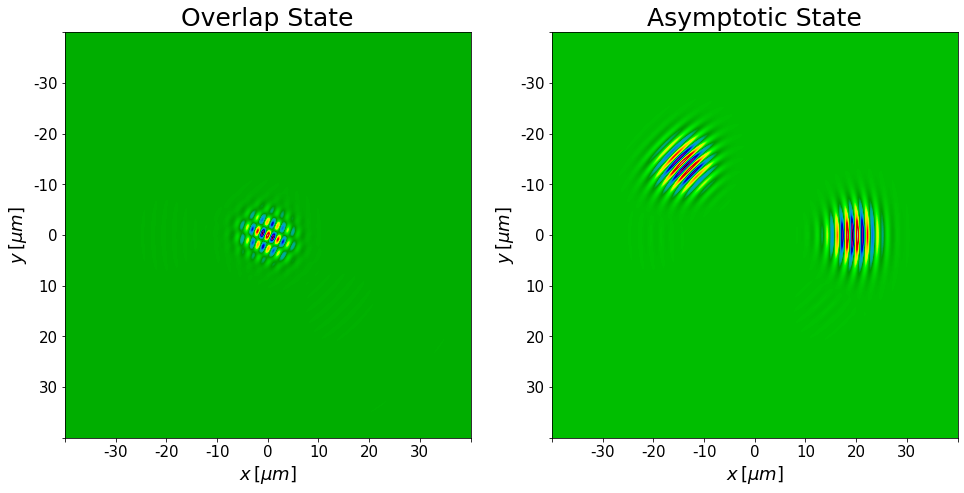

In [48]:
plt.figure(figsize=(16,9))
for i in range(2):
    plt.subplot(1,2,i+1)
    if(i==0):
        plt.title("Overlap State",fontsize=25)
    if(i==1):
        plt.title("Asymptotic State",fontsize=25)
        
    plt.imshow(np.rot90(ez[i][:,:,100],k=-1),cmap="nipy_spectral")  # Rotation to get the correct axes in the imshow plot
    plt.xlabel("$x \, [\mu m]$",size=18)
    plt.ylabel("$y \, [\mu m]$",size=18)
    pos_xs = np.linspace(0,800,9)
    pos_labels = ["","-30","-20","-10","0","10","20","30",""]
    plt.xticks(pos_xs,pos_labels,size=15)
    plt.yticks(pos_xs,pos_labels,size=15)
    
plt.show()

The pulses leave an imprint at their initial position.

### Bottom slice $(2.5\mu m)$:

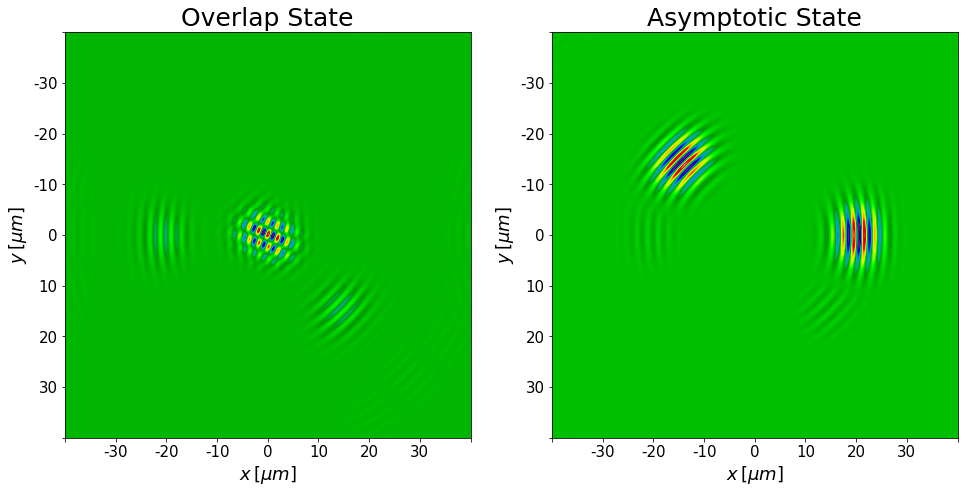

In [72]:
plt.figure(figsize=(16,9))
for i in range(2):
    plt.subplot(1,2,i+1)
    if(i==0):
        plt.title("Overlap State",fontsize=25)
    if(i==1):
        plt.title("Asymptotic State",fontsize=25)
        
    plt.imshow(np.rot90(ez[i][:,:,25],k=-1),cmap="nipy_spectral")  # Rotation to get the correct axes in the imshow plot
    plt.xlabel("$x \, [\mu m]$",size=18)
    plt.ylabel("$y \, [\mu m]$",size=18)
    pos_xs = np.linspace(0,800,9)
    pos_labels = ["","-30","-20","-10","0","10","20","30",""]
    plt.xticks(pos_xs,pos_labels,size=15)
    plt.yticks(pos_xs,pos_labels,size=15)
    
plt.show()

## Better visualize how amplitudes change in vertical direction

Caution: These are very expensive.

In [ ]:
sh_0, sh_1 = ez[0][:,:,100].shape
x, y = np.linspace(-40, 40, sh_0), np.flip(np.linspace(-40, 40, sh_1))
z01=ez[0][:,:,100]
z02=ez[0][:,:,50]
z03=ez[0][:,:,25]
z11=ez[1][:,:,100]
z12=ez[1][:,:,50]
z13=ez[1][:,:,25]

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Overlap State', 'Asymptotic State'],
                    )

fig.add_trace( go.Surface(z=z01, x=x, y=y, showscale=False, opacity=0.5,colorscale='Turbo'),1,1)
fig.add_trace( go.Surface(z=z02-0.1, x=x, y=y, showscale=False, opacity=0.5,colorscale='Turbo'),1,1)
fig.add_trace( go.Surface(z=z03-0.15, x=x, y=y, showscale=False, opacity=0.5,colorscale='Turbo'),1,1)

fig.add_trace( go.Surface(z=z11, x=x, y=y, showscale=False, opacity=0.5,colorscale='Turbo'),1,2 )
fig.add_trace( go.Surface(z=z12-0.1, x=x, y=y, showscale=False, opacity=0.5,colorscale='Turbo'),1,2 )
fig.add_trace( go.Surface(z=z13-0.15, x=x, y=y, showscale=False, opacity=0.5,colorscale='Turbo'),1,2 )


fig.update_layout(title=r'$\text{Vertical heights: }10\mu m \, , \ 5\mu m \, , \ 2.5\mu m $',
                  autosize=False,
                  width=1000, height=500,
                  #margin=dict(l=65, r=50, b=65, t=90))
                  scene=dict(zaxis=dict(ticks=""))
                 )
fig.show()

Interactive plotly plots are very resource intensive.
Here an image snapshot was saved.
The quality is not that good.

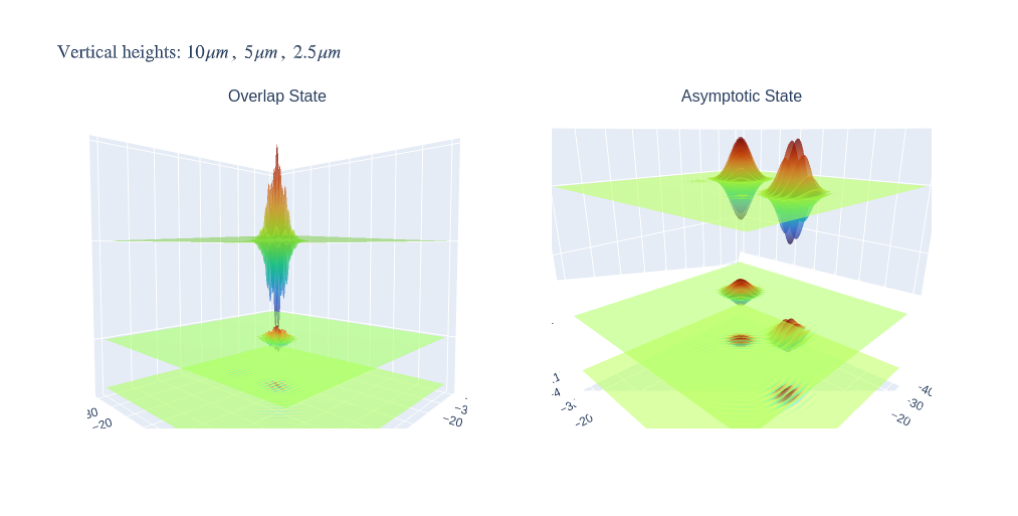

In [11]:
img = mpimg.imread("plotly_plots/gauss3d_hh_gen.png")
plt.figure(figsize=(18,11))
plt.axis('off')
plt.imshow(img)
plt.show()

### Check out the Harmonics in Frequency Space

After a Fourier transformation, the pulse frequency is located at $\omega_p=80\mu m/2\mu m = 40$. This is thus a convenient unit to use.

### Middle slice:

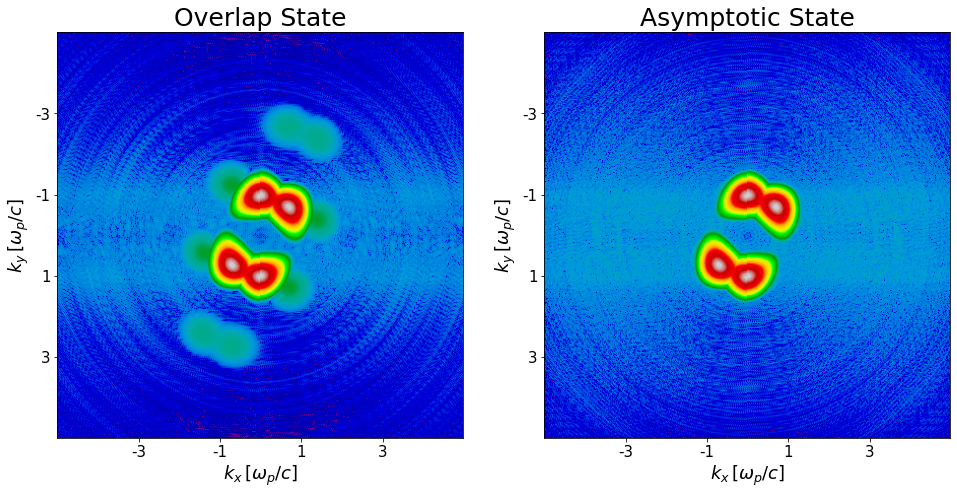

In [64]:
fft2_states = []
plt.figure(figsize=(16,9))

for i in range(2):
    fft2_states.append(np.fft.fft2(ez[i][:,:,100]))
    fft2_states[i] = 0.1*np.log(np.abs(fft2_states[i])+1e-18)
    #magnitude_spectrum = np.square(fft_states[i])
    fft2_states[i] = np.roll(fft2_states[i],int(len(ez[i])/2))
    fft2_states[i] = np.roll(fft2_states[i],int(len(ez[i])/2),axis=0) # Roll to center the harmonics
    fft2_states[i] = np.where(fft2_states[i]<-3.,-3.,fft2_states[i])  # Make contours finer


    plt.subplot(1,2,i+1)
    if(i==0):
        plt.title("Overlap State",fontsize=25)
    if(i==1):
        plt.title("Asymptotic State",fontsize=25)
        
    xs = [(200-120),(200-40),(200+40),(200+120)]
    labels = ["-3","-1","1","3"]
    plt.imshow(fft2_states[i][200:600,200:600], cmap = 'nipy_spectral')
    plt.xticks(xs,labels,size=15)
    plt.yticks(xs,labels,size=15)
    plt.xlabel("$k_x \, [\omega_p/c]$",size=18)
    plt.ylabel("$k_y \, [\omega_p/c]$",size=18)
    
plt.show()

You cannot see as many harmonics as in the [2D case](2d.ipynb).
In comparison with it, only those higher harmonics with the highest amplitude remain to be seen here.
The rest is washed out by numerical errors.
These can also be detected in the [1D case](1d.ipynb).
Asymptotic harmonics vanish entirely.

### Bottom slice:

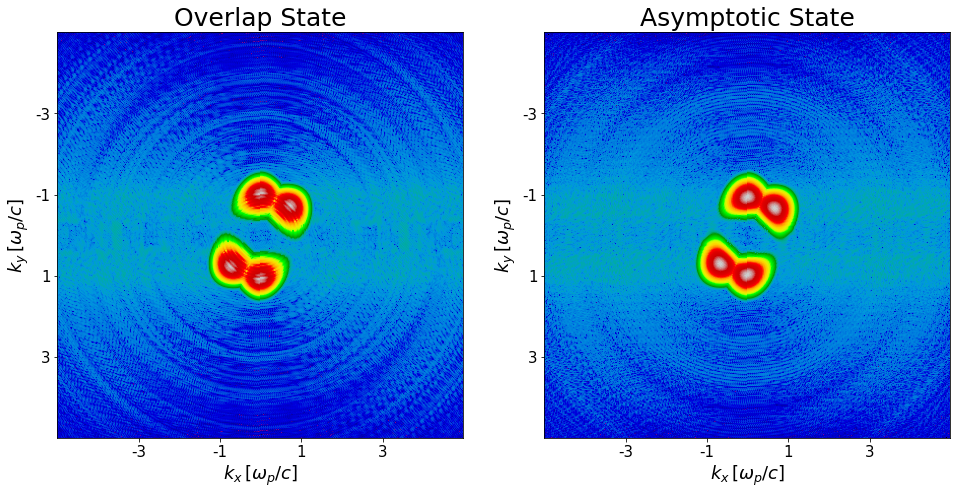

In [73]:
fft2_states = []
plt.figure(figsize=(16,9))

for i in range(2):
    fft2_states.append(np.fft.fft2(ez[i][:,:,25]))
    fft2_states[i] = 0.1*np.log(np.abs(fft2_states[i])+1e-18)
    #magnitude_spectrum = np.square(fft_states[i])
    fft2_states[i] = np.roll(fft2_states[i],int(len(ez[i])/2))
    fft2_states[i] = np.roll(fft2_states[i],int(len(ez[i])/2),axis=0) # Roll to center the harmonics
    fft2_states[i] = np.where(fft2_states[i]<-3.,-3.,fft2_states[i])  # Make contours finer


    plt.subplot(1,2,i+1)
    if(i==0):
        plt.title("Overlap State",fontsize=25)
    if(i==1):
        plt.title("Asymptotic State",fontsize=25)
        
    xs = [(200-120),(200-40),(200+40),(200+120)]
    labels = ["-3","-1","1","3"]
    plt.imshow(fft2_states[i][200:600,200:600], cmap = 'nipy_spectral')
    plt.xticks(xs,labels,size=15)
    plt.yticks(xs,labels,size=15)
    plt.xlabel("$k_x \, [\omega_p/c]$",size=18)
    plt.ylabel("$k_y \, [\omega_p/c]$",size=18)
    
plt.show()

The higher harmonics are no longer detectable in the (vertically) outer regions.

#### Same as above with $1\mu m$ wavelength

In [79]:
component=2
path = os.path.join(scratch_dir,folder2)
step=50
n_prc=list(range(0,128))
n_patches=[8,8,2]
patch_shape=[100,100,100]

In [80]:
ez50=gfd.get_field3D(path,component,n_prc,patch_shape,n_patches,step)

In [81]:
ezs50 = ez50[:,:,100]

In [87]:
step=100
ez100=gfd.get_field3D(path,component,n_prc,patch_shape,n_patches,step)

In [88]:
ezs100 = ez100[:,:,100]

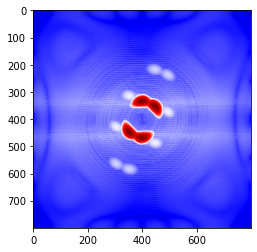

In [86]:
fft2_50 = np.fft.fft2(ezs50)

fft2_50 = 0.1*np.log(np.abs(fft2_50)+1e-18)

fft2_50 = np.roll(np.roll(fft2_50,int(len(ezs50)/2)),int(len(ezs50)/2),axis=0)

fft2_50 = np.where(fft2_50<-3.,-3.,fft2_50)  # Make contours finer

plt.imshow(fft2_50, cmap = 'seismic')

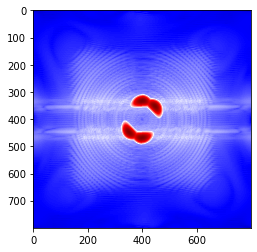

In [92]:
fft2_100 = np.fft.fft2(ezs100)

fft2_100 = 0.1*np.log(np.abs(fft2_100)+1e-18)

fft2_100 = np.roll(np.roll(fft2_100,int(len(ezs100)/2)),int(len(ezs100)/2),axis=0)

fft2_100 = np.where(fft2_100<-3.,-3.,fft2_100)  # Make contours finer

plt.imshow(fft2_100, cmap = 'seismic')